<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [56]:
!pip install scikit-learn
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 190.9 MB/s eta 0:00:0000:01


In [57]:
import sklearn

In [2]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


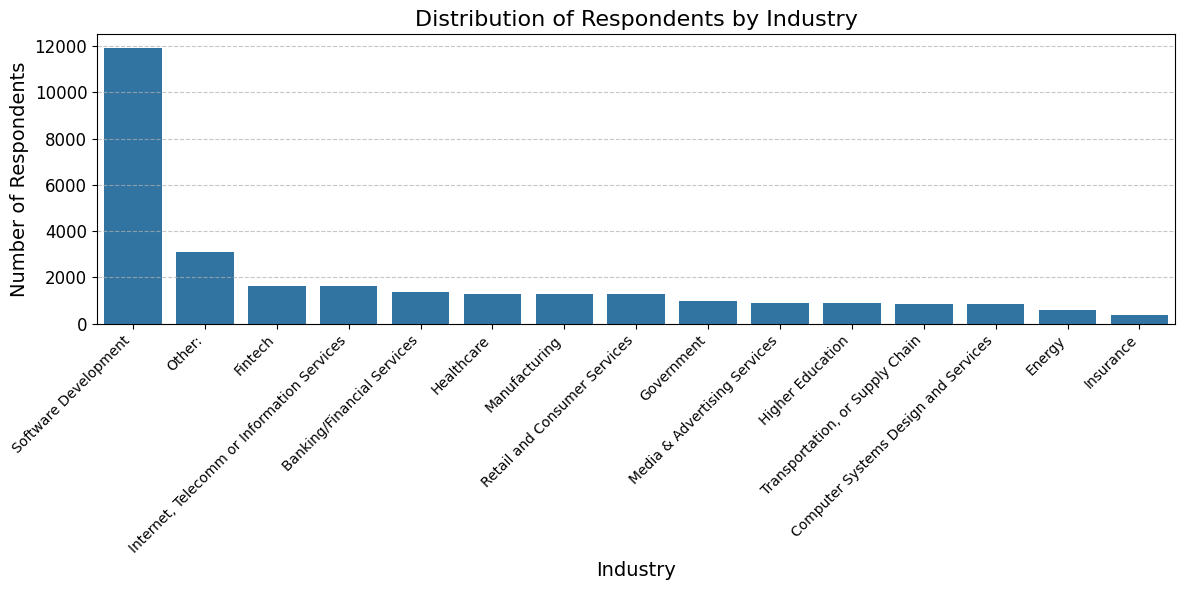

In [4]:
# Count the number of respondents in each industry
industry_counts = df['Industry'].value_counts()

# Plot the vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values)

# Formatting the plot
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels for readability
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [74]:
Conv_df=df.dropna(subset=['ConvertedCompYearly'])

In [75]:
Conv_df['ConvertedCompYearly'].info()

<class 'pandas.core.series.Series'>
Index: 23435 entries, 72 to 41187
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23435 non-null  float64
dtypes: float64(1)
memory usage: 366.2 KB


In [76]:
#We can use the describe() method to get the basic statistics
Conv_df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [104]:
threshold = (3*(Conv_df['ConvertedCompYearly'].std()))+(Conv_df['ConvertedCompYearly'].mean())

In [105]:
threshold

np.float64(646426.2065215341)

In [106]:
above_threshold = Conv_df[Conv_df['ConvertedCompYearly'] > threshold]

In [80]:
above_threshold['ConvertedCompYearly']

529       650000.0
828      1000000.0
1932      945000.0
2171      750000.0
2187     2000000.0
           ...    
38219    1000000.0
39643    1300000.0
40066     800000.0
40952     750000.0
41027     700000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [83]:
#We will use the IQR method to find these values
Q1 = Conv_df['ConvertedCompYearly'].quantile(0.25)
Q3 = Conv_df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
print(f"Q1: {Q1} and Q3: {Q3}")
print(f"IQR: {IQR}")

#Calculating upper and lower limits using the IQR, Q1 and Q3
upper_limit= Q3+1.5*IQR
print(f"Upper Limit: {upper_limit}")
lower_limit = Q1-1.5*IQR
print(f"Lower Limit: {lower_limit}")

Q1: 32712.0 and Q3: 107971.5
IQR: 75259.5
Upper Limit: 220860.75
Lower Limit: -80177.25


In [102]:
Outliers_df = Conv_df[(Conv_df['ConvertedCompYearly'] <=lower_limit) |
                  (Conv_df['ConvertedCompYearly'] >= upper_limit)]

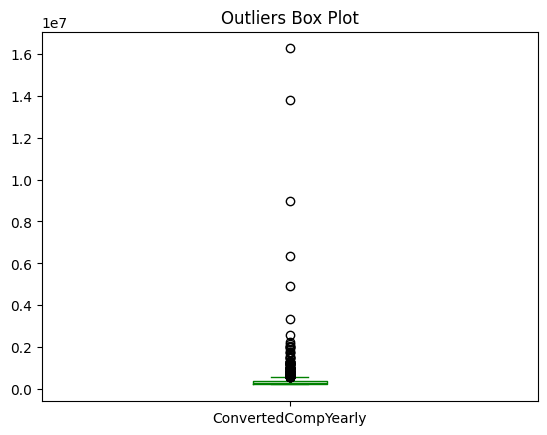

In [109]:
Outliers_df['ConvertedCompYearly'].plot(kind = 'box', color='green', title = 'Outliers Box Plot')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [97]:
# We can create a boolean masks to use as our conditional statement
#for detecting and removing the outliers
upper_mask = Conv_df['ConvertedCompYearly'] >= upper_limit
lower_mask = Conv_df['ConvertedCompYearly'] <= lower_limit

# Combine the masks (logical OR) for rows outside the range
out_of_range_mask = upper_mask | lower_mask

# Drop rows where the condition is True
new_df = Conv_df[~out_of_range_mask]

In [110]:
new_df.shape

(22457, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [123]:
##Write your code here
df_age=df['Age'].replace({'years old':'', 'Under':'', 'years or older': ''}, regex=True)
df_age = df_age.str.strip()
# Function to clean and convert the range values in age
def clean_age(value):
    if isinstance(value, (int, float)):
        return float(value) 
    if '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    elif value.isdigit():
        return float(value)
    return None
df_age = df_age.apply(clean_age)

In [124]:
df['Age'] = list(df_age) 

In [127]:
df_num= df.select_dtypes(exclude='object')

In [131]:
df_num.dropna(inplace= True)

In [134]:
df_num.corr()

<bound method DataFrame.corr of        ResponseId   Age  CompTotal  WorkExp  JobSatPoints_1  JobSatPoints_4  \
72             73  21.0  2040000.0      3.0            90.0            10.0   
379           380  39.5    85000.0      7.0             0.0             0.0   
389           390  29.5   110000.0      8.0            10.0             0.0   
392           393  39.5   126420.0     18.0            40.0             0.0   
398           399  49.5   195000.0     30.0            30.0             0.0   
...           ...   ...        ...      ...             ...             ...   
41175       41176  21.0   360000.0      4.0            10.0             5.0   
41178       41179  21.0   240800.0      2.0           100.0           100.0   
41184       41185  49.5   170000.0     30.0            10.0            15.0   
41186       41187  21.0    12000.0      1.0            20.0             5.0   
41187       41188  59.5   200000.0     40.0            25.0             5.0   

       JobSatPoints

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
